<a href="https://colab.research.google.com/github/Vinnzxx/Test/blob/main/Workshop_Vincentius_Praskatama_A11_2021_13456.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# lokasi file
path = "/content/sample_data/post-operative-new.data"

# read file
data = pd.read_csv(path, header=None, sep=",")

# menambahkan nama kolom
column = ["PATIENT NUMBER", "L-CORE", "L-SURF", "L-O2", "L-BP", "SURF-STBL", "CORE-STBL", "BP-STBL", "COMFORT", "ADM-DECS"]

# stetting nama kolom
data.columns = column

data.head()

,PATIENT NUMBER,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,0,mid,low,excellent,mid.1,stable,stable.1,stable.2,15,A
1,1,mid,high,excellent,high,stable,stable,stable,10,S
2,2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,4,mid,mid,excellent,high,stable,stable,stable,10,A


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PATIENT NUMBER  90 non-null     int64 
 1   L-CORE          90 non-null     object
 2   L-SURF          90 non-null     object
 3   L-O2            81 non-null     object
 4   L-BP            90 non-null     object
 5   SURF-STBL       81 non-null     object
 6   CORE-STBL       90 non-null     object
 7   BP-STBL         90 non-null     object
 8   COMFORT         81 non-null     object
 9   ADM-DECS        89 non-null     object
dtypes: int64(1), object(9)
memory usage: 7.2+ KB


In [ ]:
# konversi tipe data comfort menjadi numerik (menyesuaikan referensi)
data["COMFORT"] = pd.to_numeric(data["COMFORT"], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PATIENT NUMBER  90 non-null     int64  
 1   L-CORE          90 non-null     object 
 2   L-SURF          90 non-null     object 
 3   L-O2            81 non-null     object 
 4   L-BP            90 non-null     object 
 5   SURF-STBL       81 non-null     object 
 6   CORE-STBL       90 non-null     object 
 7   BP-STBL         90 non-null     object 
 8   COMFORT         78 non-null     float64
 9   ADM-DECS        89 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.2+ KB


In [ ]:
# Mengidentifikasi jenis kolom (variabel) dalam sebuah dataframe berdasarkan tipe data dan karakteristiknya

def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

# Memanggil fungsi grab_col_names yang telah didefinisikan untuk memisahkan kolom-kolom dalam dataframe menjadi tiga kategori berdasarkan tipe data dan karakteristik distribusinya
cat_cols, num_cols, cat_but_car = grab_col_names(data)

Jumlah observasi: 90
Jumlah variabel: 10
Kolom kategorikal: 9
Kolom Numerik: 1


In [ ]:
# cek data kategorikal

for col in cat_cols:
  print(f"{col} has {data[col].unique()} values\n")

L-CORE has ['mid' 'high' 'low'] values

L-SURF has ['low' 'high' 'mid'] values

L-O2 has ['excellent' 'good' nan] values

L-BP has ['mid.1' 'high' 'mid' 'low'] values

SURF-STBL has ['stable' nan 'unstable'] values

CORE-STBL has ['stable.1' 'stable' 'unstable' 'mod-stable'] values

BP-STBL has ['stable.2' 'stable' 'mod-stable' 'unstable'] values

ADM-DECS has ['A' 'S' 'A ' nan 'I'] values

COMFORT has [15. 10.  5. nan  7.] values



In [ ]:
data['ADM-DECS'] = data['ADM-DECS'].replace({'A ': 'A'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PATIENT NUMBER  90 non-null     int64  
 1   L-CORE          90 non-null     object 
 2   L-SURF          90 non-null     object 
 3   L-O2            81 non-null     object 
 4   L-BP            90 non-null     object 
 5   SURF-STBL       81 non-null     object 
 6   CORE-STBL       90 non-null     object 
 7   BP-STBL         90 non-null     object 
 8   COMFORT         78 non-null     float64
 9   ADM-DECS        89 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.2+ KB


In [ ]:
# Cek missing value
data.isnull().sum()

,0
PATIENT NUMBER,0
L-CORE,0
L-SURF,0
L-O2,9
L-BP,0
SURF-STBL,9
CORE-STBL,0
BP-STBL,0
COMFORT,12
ADM-DECS,1


In [ ]:
# Imputasi missing value dengan median (untuk kolom numerik)
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

# Imputasi missing value dengan modus (untuk kolom kategorikal)
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Cek kembali missing value setelah imputasi
data.isnull().sum()

,0
PATIENT NUMBER,0
L-CORE,0
L-SURF,0
L-O2,0
L-BP,0
SURF-STBL,0
CORE-STBL,0
BP-STBL,0
COMFORT,0
ADM-DECS,0


In [ ]:
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PATIENT NUMBER  90 non-null     int64  
 1   L-CORE          90 non-null     object 
 2   L-SURF          90 non-null     object 
 3   L-O2            90 non-null     object 
 4   L-BP            90 non-null     object 
 5   SURF-STBL       90 non-null     object 
 6   CORE-STBL       90 non-null     object 
 7   BP-STBL         90 non-null     object 
 8   COMFORT         90 non-null     float64
 9   ADM-DECS        90 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.2+ KB


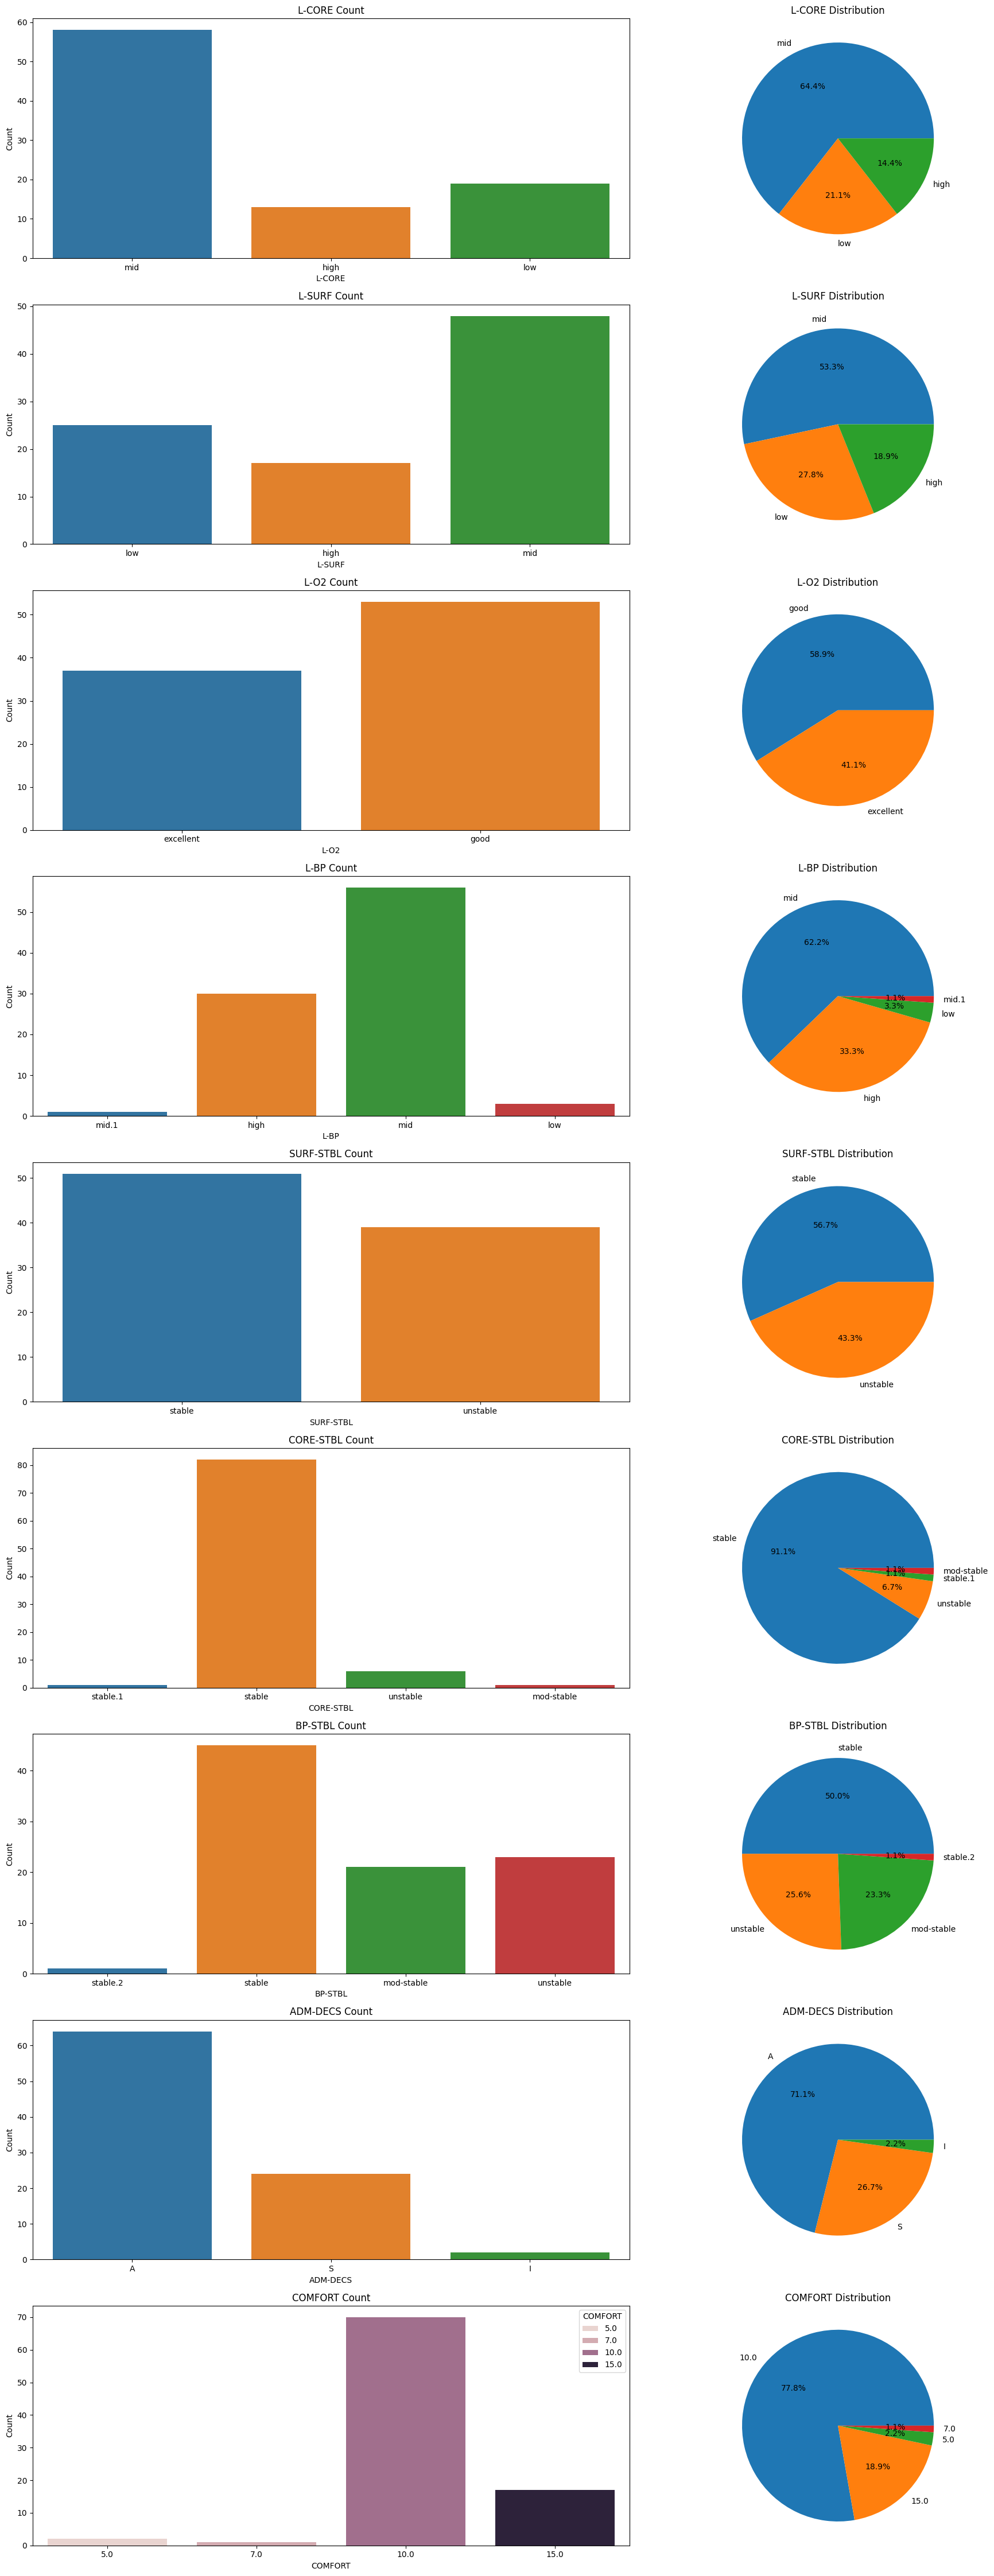

In [ ]:
import matplotlib.pyplot as plt # visualisasi data (grafik dasar seperti garis, batang).
import seaborn as sns # visualisasi statistik yang lebih menarik dan informatif.

# Memvisualisasikan distribusi kolom-kolom kategorikal dalam sebuah dataframe menggunakan dua jenis plot: countplot dan pie plot
def plot_categorical(dataframe, categorical_columns): # membuat visualisasi untuk kolom kategorikal dalam dataset.
    num_cols = len(categorical_columns) # daftar kolom kategorikal yang akan divisualisasikan.
    num_rows = num_cols
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # Countplot: Membuat countplot untuk distribusi jumlah kategori.
        sns.countplot(x=col, data=dataframe, ax=axes[2*i], hue=col) # menunjukkan jumlah observasi dalam setiap kategori menggunakan bar chart.
        axes[2*i].set_title(f'{col} Count')
        axes[2*i].set_xlabel(col)
        axes[2*i].set_ylabel('Count')

        # Pieplot: Membuat pieplot untuk distribusi proporsi kategori.
        dataframe[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2*i+1]) # menampilkan proporsi kategori dalam bentuk diagram lingkaran.
        axes[2*i+1].set_title(f'{col} Distribution')
        axes[2*i+1].set_ylabel('')

    # Menyesuaikan layout dengan plt.tight_layout() untuk hasil visualisasi yang rapi.
    plt.tight_layout()
    plt.show()

plot_categorical(data, cat_cols)  # Ganti 'data' dengan 'data' jika Anda ingin menggunakan dataframe original

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Dapatkan daftar fitur kategorikal
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Buat objek LabelEncoder
encoder = LabelEncoder()

# Loop melalui setiap fitur kategorikal dan lakukan encoding untuk mengubah kategorikal menjadi numerik
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])

data.head()

,PATIENT NUMBER,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,0,2,1,0,3,0,2,2,15.0,0
1,1,2,0,0,0,0,1,1,10.0,2
2,2,0,1,0,0,0,1,0,10.0,0
3,3,2,1,1,0,0,3,0,15.0,0
4,4,2,2,0,0,0,1,1,10.0,0


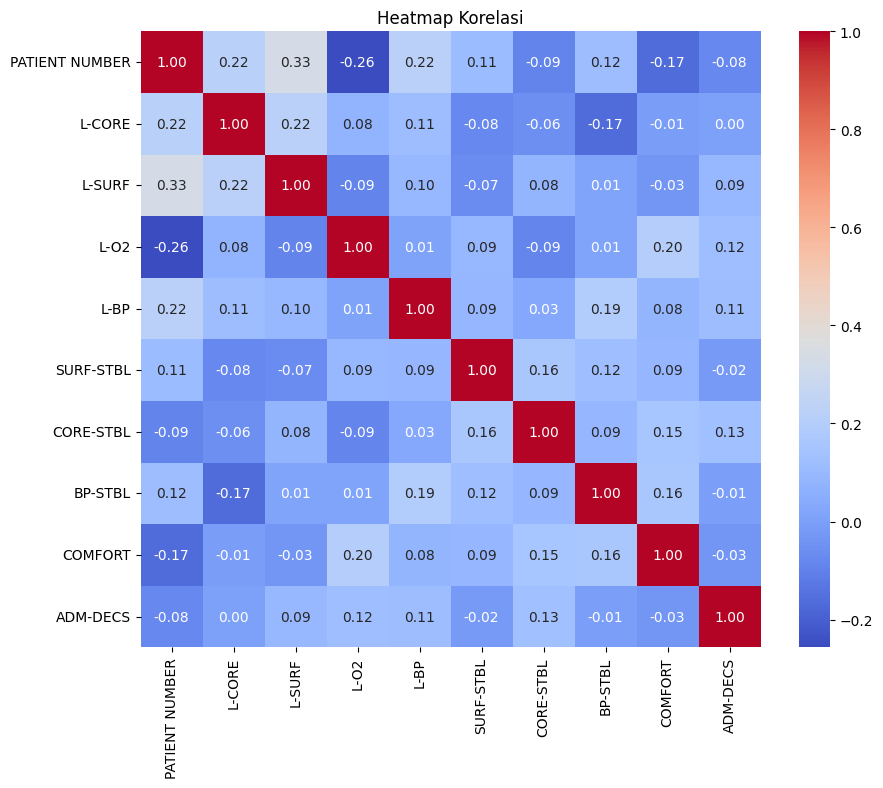

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi
correlation_matrix = data.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))  # Atur ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    dataframe_filtered = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

    return dataframe_filtered

# Menghapus outlier dari semua kolom numerik
for column in num_cols:
    data1 = remove_outliers_iqr(data, column)

# Verifikasi jumlah data setelah penghapusan outlier
print(f"Jumlah data sebelum penghapusan outlier: {len(data)}")
print(f"Jumlah data setelah penghapusan outlier: {len(data1)}")

Jumlah data sebelum penghapusan outlier: 90
Jumlah data setelah penghapusan outlier: 90


In [ ]:
# feature selection

features = ["L-CORE", "L-SURF", "L-O2", "L-BP", "CORE-STBL", "ADM-DECS"]

data = data[features]

data.head()

,L-CORE,L-SURF,L-O2,L-BP,CORE-STBL,ADM-DECS
0,2,1,0,3,2,0
1,2,0,0,0,1,2
2,0,1,0,0,1,0
3,2,1,1,0,3,0
4,2,2,0,0,1,0


In [ ]:
# Memisahkan fitur (X) dan target (y) dalam dataset
X = data.drop("ADM-DECS", axis = 1)
y = data["ADM-DECS"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan fit dan transform pada fitur (X)
X_normalized = scaler.fit_transform(X)

# Membuat DataFrame baru dengan fitur yang telah dinormalisasi
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Menampilkan beberapa baris pertama dari DataFrame yang telah dinormalisasi
X_normalized.head()

,L-CORE,L-SURF,L-O2,L-BP,CORE-STBL
0,1.0,0.5,0.0,1.0,0.666667
1,1.0,0.0,0.0,0.0,0.333333
2,0.0,0.5,0.0,0.0,0.333333
3,1.0,0.5,1.0,0.0,1.000000
4,1.0,1.0,0.0,0.0,0.333333


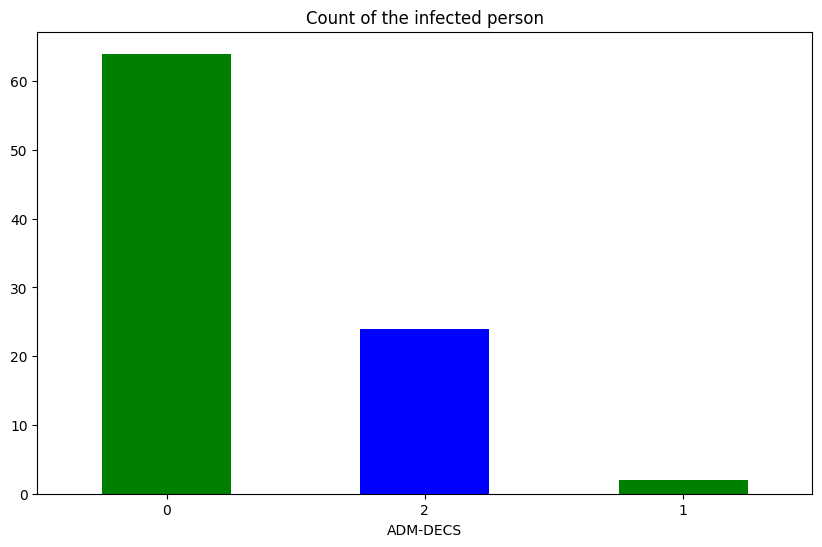

In [ ]:
# Membuat visualisasi berupa diagram batang (bar plot) yang menunjukkan jumlah individu yang termasuk dalam masing-masing kategori pada kolom infected
data['ADM-DECS'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the infected person")
plt.xticks(rotation=0);

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you have your features in 'X' and target in 'y'

# Initialize SMOTE with a smaller k_neighbors value
smote = SMOTE(random_state=42, k_neighbors=1)  # or k_neighbors=minority_class_size - 1

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


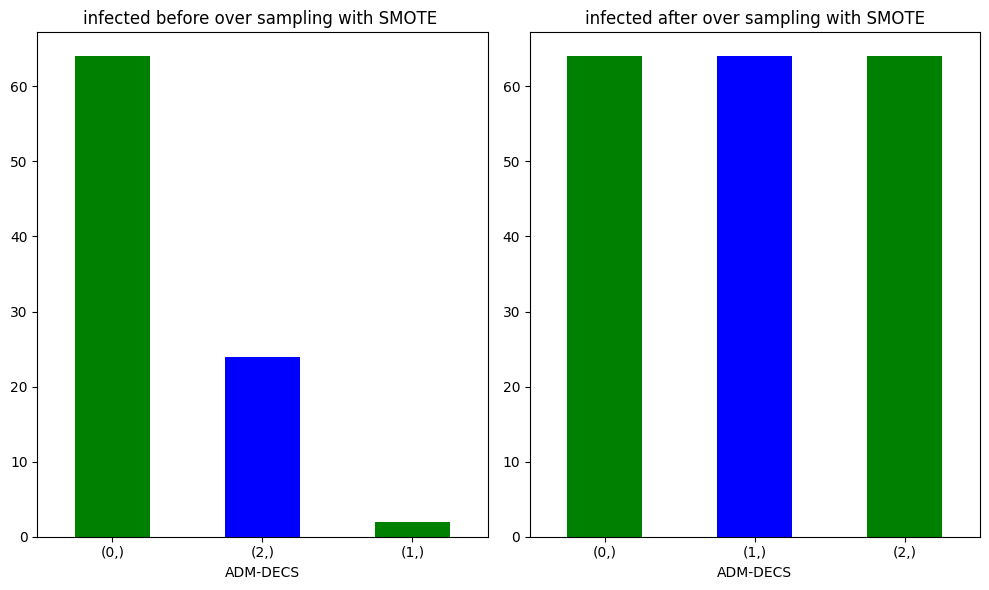

In [ ]:
plt.figure(figsize=(12, 4)) # Membuat sebuah figure (gambar) baru dengan ukuran 12x4 inci

new_df1 = pd.DataFrame(data=y) # Membuat DataFrame baru, new_df1

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("infected before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2) # Membuat subplot pertama dengan layout 1 baris dan 2 kolom
new_df2 = pd.DataFrame(data=y_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue']) # Menghitung frekuensi masing-masing kategori (0 dan 1), membuat diagram batang (bar plot) berdasarkan frekuensi kategori
plt.title("infected after over sampling with SMOTE") # Memberikan judul pada subplot pertama
plt.xticks(rotation=0); # Menetapkan label sumbu-x (kategori 0 dan 1) untuk tetap dalam posisi horizontal

plt.tight_layout() # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show() # Menampilkan kedua plot dalam satu figure

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy with Best Model: 0.6666666666666666


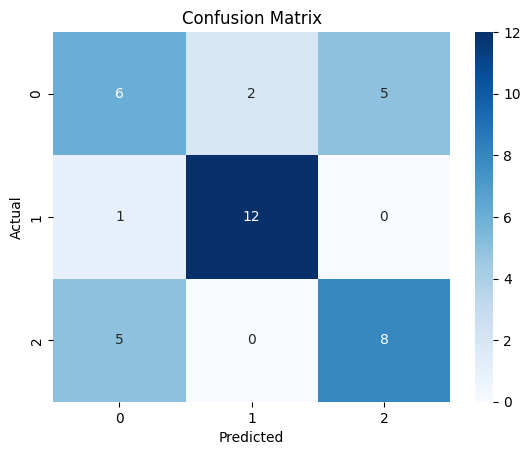

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.86      0.92      0.89        13
           2       0.62      0.62      0.62        13

    accuracy                           0.67        39
   macro avg       0.66      0.67      0.66        39
weighted avg       0.66      0.67      0.66        39



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Measure for split quality
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  # Use accuracy as the scoring metric
                           cv=5,  # Perform 5-fold cross-validation
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new model with the best hyperparameters
best_model = DecisionTreeClassifier(random_state=42, **best_params)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy}")

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy with Best Model: 0.717948717948718


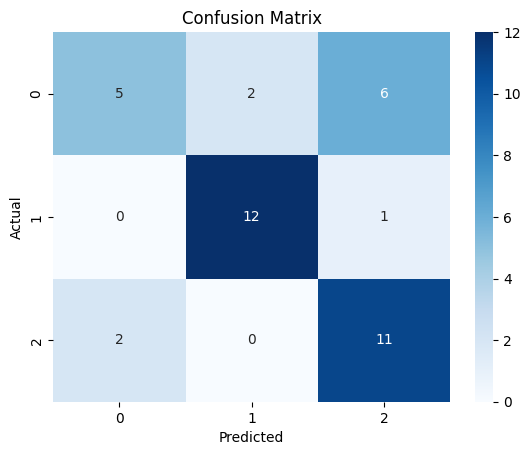

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.86      0.92      0.89        13
           2       0.61      0.85      0.71        13

    accuracy                           0.72        39
   macro avg       0.73      0.72      0.70        39
weighted avg       0.73      0.72      0.70        39



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Function to measure split quality
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

# Create a GridSearchCV object for Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new model with the best hyperparameters
best_model = RandomForestClassifier(random_state=42, **best_params)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))
